# Лабораторная работа № 2. Логистическая регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [1]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Populating the interactive namespace from numpy and matplotlib


In [2]:
ds = pd.read_csv('Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [3]:
from sklearn.linear_model import LogisticRegression

## Задание

1. Обучите модель логистической регресси на данных, используя в качестве целевой переменной пол (sex), а в качестве признаков рост и вес (height, weight).
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой
3. Расширьте простарнство признаков квадратичными признаками.
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой

In [4]:
#Load and filtering dataset
from sklearn.model_selection import train_test_split
dataset = pd.DataFrame(ds.dropna())
dataset

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
195,F,62,164,61.0,161.0
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
199,M,90,181,91.0,178.0


In [5]:
dataset.describe()

,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000
mean,65.701657,170.756906,65.679558,168.657459
std,13.425492,8.954609,13.834220,9.394668
min,39.000000,148.000000,41.000000,148.000000
25%,56.000000,164.000000,55.000000,161.000000
50%,63.000000,169.000000,63.000000,168.000000
75%,74.000000,178.000000,74.000000,175.000000
max,119.000000,197.000000,124.000000,200.000000


In [6]:
dataset = dataset[dataset.height > 100]
dataset = dataset[dataset.repht > 100]
x = pd.DataFrame(dataset[['weight','height' ]]) 
y= pd.DataFrame(dataset['sex'])
y['sex'] = y['sex'].map( {'F': 0, 'M': 1} ).astype(int)
X_train, X_valid, y_train, y_valid =  train_test_split(x, y, test_size = 0.25)
#x_train = pd.DataFrame(X_train.drop(['sex', 'repwt', 'repht'], axis = 1))
#x_valid = pd.DataFrame(X_valid.drop(['sex', 'repwt', 'repht'], axis = 1))

In [7]:
print(X_train)
print(y_train)

     weight  height
112      79     179
95       88     189
187      60     172
78       63     160
194      51     156
..      ...     ...
103      47     163
41       54     164
21      119     180
101      55     164
197      83     180

[135 rows x 2 columns]
     sex
112    1
95     1
187    0
78     0
194    0
..   ...
103    0
41     0
21     1
101    0
197    1

[135 rows x 1 columns]


<IPython.core.display.Javascript object>


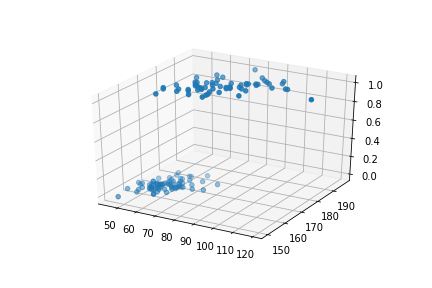

In [8]:
#Our data
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(X_train['weight'].values, X_train['height'].values, y_train.values)


In [9]:
#Lerning model
clf = LogisticRegression().fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#Get prediction
y_predict = clf.predict(X_valid)

In [11]:
#Get weights of model
dense = clf.densify().coef_[0] 
dense = np.append(dense, clf.intercept_)
print("B0 = ",dense[2],"; B1 = ", dense[0],"; B2 = ", dense[1]) 

B0 =  -54.61546559061955 ; B1 =  0.13301042708217226 ; B2 =  0.2680766148664136


In [12]:
#Find the points of the dividing plane
x = np.arange(min(X_valid['weight'].values), max(X_valid['weight'].values), 0.05)
y = np.arange(min(X_valid['height'].values), max(X_valid['height'].values), 0.05)
x_f = []
y_f = []
z_f = []
eps = 0.01
for x_ in x:
    for y_ in y:
       if((dense[0] * x_ + dense[1] * y_ + dense[2]) < eps) and ((dense[0] * x_ + dense[1] * y_ + dense[2]) > -eps) :
            x_f.append(x_)
            y_f.append(y_)
            z_f.append(0)
            x_f.append(x_)
            y_f.append(y_)
            z_f.append(1)
        

<IPython.core.display.Javascript object>


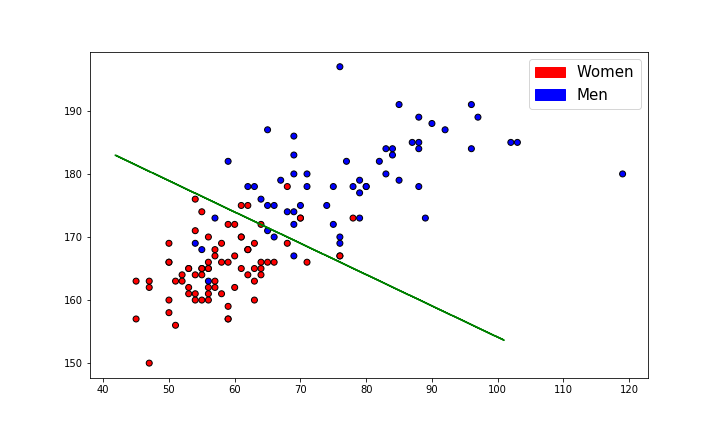

In [13]:
"""fig = plt.figure()
ax = fig.add_subplot(projection='3d')
color 
ax.scatter(X_valid['weight'].values, X_valid['height'].values)
ax.plot(x_f, y_f,color = 'red')
"""
plt.figure(figsize = (10, 6))
colors = y_train['sex'].map({0: 'r', 1: 'b'})
plt.scatter(X_train['weight'], X_train['height'], c=colors, edgecolors = 'black')
red_patch = mpatches.Patch(color='red', label='Women')
blue_patch = mpatches.Patch(color='blue', label='Men')
plt.legend(handles=[red_patch, blue_patch], fontsize = 15)
plt.plot(x_f, y_f, color ="green")
plt.show()

In [31]:
#Score
print("SCore: ",clf.score(X_valid, y_valid))

SCore:  0.9347826086956522


<IPython.core.display.Javascript object>


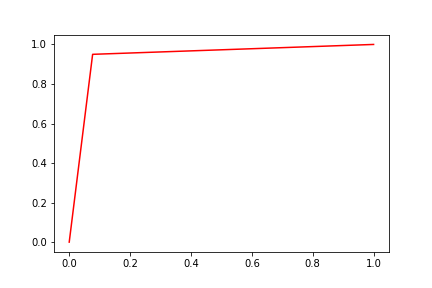

In [15]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

In [16]:
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_valid.values, y_predict))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_valid.values, y_predict))

Recall:  0.95
Precision:  0.9047619047619048


# Дополненная модель

In [17]:
z1 = np.ones(len(X_train))
z2 = np.ones(len(X_valid))
print(len(z1))
z1

135


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
sqr_w_t = (X_train["weight"] * X_train["weight"]).values
sqr_w_v = (X_valid["weight"] * X_valid["weight"]).values
sqr_h_t = (X_train["height"] * X_train["height"]).values
sqr_h_v = (X_valid["height"] * X_valid["height"]).values
dot_wh_t = (X_train["weight"] * X_train["height"]).values
dot_wh_v = (X_valid["weight"] * X_valid["height"]).values

print('Len(sqr_w_t) ',len(sqr_w_t))
print('Len(sqr_w_v) ',len(sqr_w_v))
print('Len(sqr_h_t) ',len(sqr_h_t))
print('Len(sqr_h_v) ',len(sqr_h_v))
print('Len(dot_wh_t) ',len(dot_wh_t))
print('Len(dot_wh_v) ',len(dot_wh_v))



Len(sqr_w_t)  135
Len(sqr_w_v)  46
Len(sqr_h_t)  135
Len(sqr_h_v)  46
Len(dot_wh_t)  135
Len(dot_wh_v)  46


In [19]:
x_train = pd.DataFrame({"ones" : z1, "weight" : X_train["weight"].values, "height": X_train["height"].values,
                        "x1^2" : sqr_w_t, "x1*x2" : dot_wh_t, "x2^2":sqr_h_t})
x_valid = pd.DataFrame({"ones" : z2, "weight" : X_valid["weight"].values, "height": X_valid["height"].values,
                        "x1^2" : sqr_w_v, "x1*x2" : dot_wh_v, "x2^2":sqr_h_v})
x_train

,ones,weight,height,x1^2,x1*x2,x2^2
0,1.0,79,179,6241,14141,32041
1,1.0,88,189,7744,16632,35721
2,1.0,60,172,3600,10320,29584
3,1.0,63,160,3969,10080,25600
4,1.0,51,156,2601,7956,24336
...,...,...,...,...,...,...
130,1.0,47,163,2209,7661,26569
131,1.0,54,164,2916,8856,26896
132,1.0,119,180,14161,21420,32400
133,1.0,55,164,3025,9020,26896


In [20]:
#Lerning model
clf_for_more = LogisticRegression().fit(x_train, y_train.values)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print("Score: ", clf_for_more.score(x_valid, y_valid))

Score:  0.9347826086956522


In [27]:
#Get prediction 
Y_predict = clf_for_more.predict(x_valid)

In [23]:
#Get weights
dense = clf_for_more.densify().coef_
dense = np.append(dense, clf_for_more.intercept_)

print("B 0 = ", dense[len(dense) - 1])
for i in range(0, len(dense) - 1):
    print("B", i + 1, ' = ', dense[i])
    

B 0 =  -0.0032950578848272845
B 1  =  -0.0032950260784095683
B 2  =  -0.10523824329980662
B 3  =  -0.2827802748533334
B 4  =  -0.00026687523299689914
B 5  =  0.0016093784666110832
B 6  =  0.001309477044194488


<IPython.core.display.Javascript object>


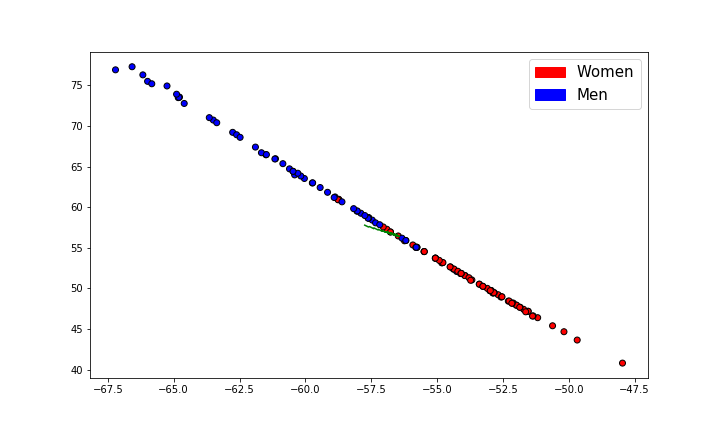

In [24]:
#Let's lower the dimension through linear dependence and find the points of the dividing plane
x1 = np.arange(min(x_valid['weight'].values), max(x_valid['weight'].values), 0.05)
x2 = np.arange(min(x_valid['height'].values), max(x_valid['height'].values), 1)

x_f = []
y_f = []
x_scat = dense[0] * 1 + dense[1] * x_train['weight'].values + dense[2] * x_train['height'].values \
                                + dense[3] * x_train['x1^2'].values + dense[len(dense) - 1] 
y_scat = dense[4] * x_train['x1*x2'].values + dense[5] * x_train['x2^2'].values + dense[len(dense) - 1] 
eps = 0.05
for x1_ in x1:
    for x2_ in x2:   
            a = dense[0] + dense[1] * x1_ + dense[2] * x2_ + dense[3] * x1_ * x1_ + dense[len(dense) - 1]
            b =  dense[4] * x1_ * x2_ + dense[5] * x2_ * x2_  + dense[len(dense) - 1]
            sol = a + b - dense[len(dense) - 1]
            if(sol < eps) and (sol > -eps) :
                x_f.append(a)
                y_f.append(b)
                x_f.append(a)
                y_f.append(b)

#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
#ax.scatter(X_valid['weight'].values * dense[0] + X_valid['height'].values * dense[1] + dense[4],
 #          X_valid['repwt'].values * dense[2] + X_valid['repht'].values * dense[3] + dense[4], y_predict)
#plt.scatter(x_scat, y_scat)
#plt.plot(x_f, y_f, color = 'red')
#plt.show()

plt.figure(figsize = (10, 6))
colors = y_train['sex'].map({0: 'r', 1: 'b'})
plt.scatter(x_scat, y_scat, c=colors, edgecolors = 'black')
red_patch = mpatches.Patch(color='red', label='Women')
blue_patch = mpatches.Patch(color='blue', label='Men')
plt.legend(handles=[red_patch, blue_patch], fontsize = 15)
plt.plot(x_f, y_f, color ="green")
plt.show()

<IPython.core.display.Javascript object>


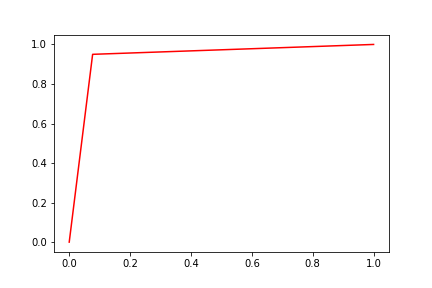

In [28]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, Y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

In [29]:
#Get precision and recall
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_valid.values, Y_predict))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_valid.values, Y_predict))

Recall:  0.95
Precision:  0.9047619047619048
